In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [3]:
from src.data_generator import *
from src.model import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = SemiMartingale(X_0=1.0, vol=2.0)

In [5]:
x = X.generate(100000, 100)
model = FFNetwork(n_layers = 2, h_dims=128)

In [6]:
lossf = MMDLoss()
#lossf = MomentLoss(degree=6, p_norm=1)

In [7]:
model._add_loss(lossf)

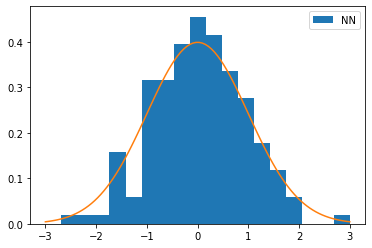

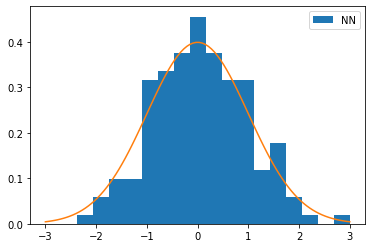

In [18]:
history = model.train(x, num_epochs=2, batch_size=256)

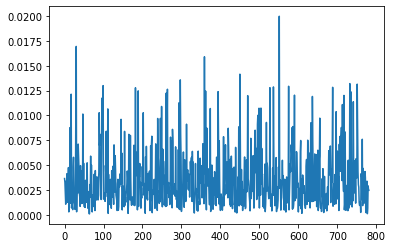

In [19]:
plt.plot(history['loss'])

In [20]:
x = X.generate(100000, 100)
iv = model(x).numpy()
iv = iv.squeeze()

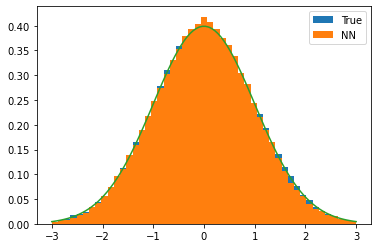

In [21]:
plot_hist(x, iv, X.get_norm_increments(), n_bins=50)

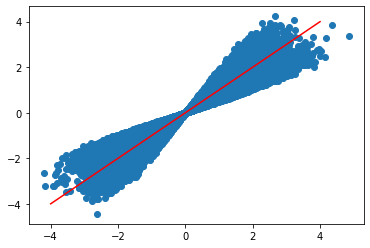

In [22]:
plt.scatter((x[:,-1] - x[:,0])/np.sqrt(iv), X.get_norm_increments())
plt.plot(np.linspace(-4,4,50),np.linspace(-4,4,50), color='red')

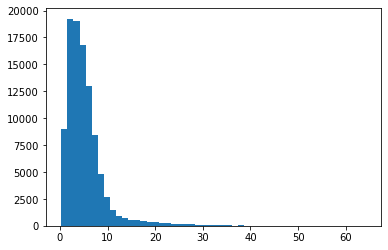

In [274]:
plt.hist(iv, bins=50)
plt.show()

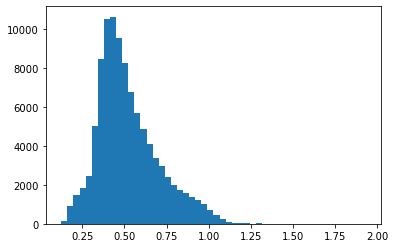

In [275]:
plt.hist(1/np.sqrt(iv), bins=50)
plt.show()

In [310]:
np.median(iv), np.mean(iv), np.std(iv)

(4.300714938809195, 5.30736693768021, 4.55241422429456)

In [309]:
model(X.generate(1, 1000))

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[6.67990825]])>

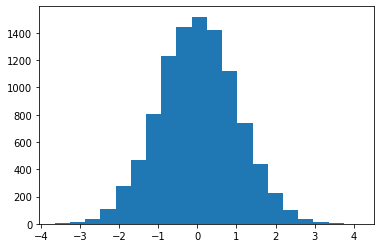

In [15]:
loss = MMDLoss()
x = X.get_total_increments()
sig = X.integrated_variance()
#loss(tf.constant(x), tf.constant(sig))
import matplotlib.pyplot as plt
plt.hist(x/np.sqrt(sig), bins=20)
plt.show()

In [136]:
true_iv

array([9., 9., 9., ..., 9., 9., 9.])

In [6]:
model = FFNetwork(n_layers =4)

In [7]:
model(x)

<tf.Tensor: id=136, shape=(1, 1), dtype=float64, numpy=array([[0.53113505]])>

In [8]:
model.summary()

Model: "ff_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6528      
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  4160      
_________________________________________________________________
dense_3 (Dense)              multiple                  4160      
_________________________________________________________________
dense_4 (Dense)              multiple                  65        
Total params: 19,073
Trainable params: 19,073
Non-trainable params: 0
_________________________________________________________________


In [136]:
loss1 = MomentLoss(weights = None, degree=10)
loss2 = MomentLoss(weights = 'exponential', degree=10)
loss3 = MomentLoss(weights = 'factorial', degree=10)

In [137]:
print(loss1(inc, int_var))
print(loss2(inc, int_var))
print(loss3(inc, int_var))

tf.Tensor(1033.9674, shape=(), dtype=float32)
tf.Tensor(0.05526517, shape=(), dtype=float32)
tf.Tensor(0.00091985625, shape=(), dtype=float32)


In [171]:
loss = MMDLoss(kernel = 'rbf', length_scale=2.0)

In [337]:
def f():
    x = None
    y = 1.0
    return x, y

In [394]:
!conda install -c conda-forge ipywidgets
!jupyter nbextension enable --py widgetsnbextension

'conda' is not recognized as an internal or external command,
operable program or batch file.
Traceback (most recent call last):
  File "C:\Users\phillip\anaconda3\envs\tf\Scripts\jupyter-nbextension-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\notebook\nbextensions.py", line 983, in start
    super(NBExtensionApp, self).start()
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\jupyter_core\application.py", line 259, in start
    self.subapp.start()
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\notebook\nbextensions.py", line 891, in start
    self.toggle_nbextension